In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf

In [2]:
df = pd.read_csv('dataset/cloud_use.csv')
df.columns

Index(['cc', 'time_stamp', 'DATE (MM/DD)', 'MST',
       'Global CMP22 (vent/cor) [W/m^2]', 'Direct sNIP [W/m^2]',
       'Azimuth Angle [degrees]', 'Tower Dry Bulb Temp [deg C]',
       'Tower Wet Bulb Temp [deg C]', 'Tower Dew Point Temp [deg C]',
       'Tower RH [%]', 'Total Cloud Cover [%]', 'Peak Wind Speed @ 6ft [m/s]',
       'Avg Wind Direction @ 6ft [deg from N]', 'Station Pressure [mBar]',
       'Precipitation (Accumulated) [mm]', 'Snow Depth [cm]', 'Moisture',
       'Albedo (CMP11)', 'date', 'time', 'p30', 'p60', 'p90', 'p120'],
      dtype='object')

In [3]:
df= df.dropna()
df.isna().sum()

cc                                       0
time_stamp                               0
DATE (MM/DD)                             0
MST                                      0
Global CMP22 (vent/cor) [W/m^2]          0
Direct sNIP [W/m^2]                      0
Azimuth Angle [degrees]                  0
Tower Dry Bulb Temp [deg C]              0
Tower Wet Bulb Temp [deg C]              0
Tower Dew Point Temp [deg C]             0
Tower RH [%]                             0
Total Cloud Cover [%]                    0
Peak Wind Speed @ 6ft [m/s]              0
Avg Wind Direction @ 6ft [deg from N]    0
Station Pressure [mBar]                  0
Precipitation (Accumulated) [mm]         0
Snow Depth [cm]                          0
Moisture                                 0
Albedo (CMP11)                           0
date                                     0
time                                     0
p30                                      0
p60                                      0
p90        

In [4]:
df.head()

,cc,time_stamp,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],...,Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),date,time,p30,p60,p90,p120
0,0.416310,0101_0101074000,01-Jan,7.4,8.53993,1.078100,122.69154,7.202,1.503,-5.597,...,0.0,0.070,0.0,0.1883,101,740,37.0,10.0,28.0,18.0
1,0.692942,0101_0101075000,01-Jan,7.5,20.59860,-0.143419,124.34405,6.646,1.306,-5.494,...,0.0,0.144,0.0,0.1758,101,750,15.0,14.0,12.0,59.0
2,0.796203,0101_0101080000,01-Jan,8.0,28.83560,0.825900,126.02976,8.660,2.480,-5.120,...,0.0,0.257,0.0,0.2118,101,800,18.0,25.0,13.0,81.0
3,0.709672,0101_0101081000,01-Jan,8.1,44.96360,4.401470,127.75072,9.210,2.811,-4.889,...,0.0,0.257,0.0,0.2146,101,810,10.0,28.0,18.0,92.0
4,0.465489,0101_0101082000,01-Jan,8.2,31.37320,0.583573,129.50890,9.610,3.002,-4.798,...,0.0,0.230,0.0,0.1984,101,820,14.0,12.0,59.0,95.0


In [12]:
def load_image(filename):
    raw = tf.io.read_file(filename)
    image = tf.image.decode_png(raw, channels=3)
  # the `print` executes during tracing.
  #print("Initial shape: ", image.shape)
  #tf.image.resize(image, [128,128])
  #print("Final shape: ", image.shape)
    return image

In [114]:
# BW
X = []
y = []
i = 0
for time_stamp in df['time_stamp']:
    folder, file = time_stamp.split('_')
    #print(folder,file)
    im = load_image('dataset/train/'+folder+'/'+file+'.jpg')
    im = im.numpy()
    #print(im.shape)
    imr = tf.image.resize(im, [50,50])
    #print(imr.shape)
    i+=1
    X.append(imr)#np.reshape(imr[:,:,1],(50,50,1)))#imr)#np.reshape(im[:,:,1],(50,50,3)))
    #print(df[df['time_stamp'] == time_stamp][['p30','p60','p90','p120']].values[0])
    y.append(df[df['time_stamp'] == time_stamp]['Total Cloud Cover [%]'].values[0])#[['p30','p60','p90','p120']].values[0])
    #print(y)
    #plt.imshow(im)
    if(i==500):
        break
   
        
X = np.array(X)
y = np.array(y)

In [115]:
y

array([-1, 13, 25, 37, 15, 18, 10, 14, 25, 28, 12, 13, 18, 59, 81, 92, 95,
       95, 96, 97, 96, 96, 97, 97, 97, 96, 91, 89, 90, 91, 90, 91, 89, 90,
       82, 48, 43, 19, 12, 33, 65, 34, 16, -1,  5,  8,  8,  8,  6,  4,  3,
       10,  7, 17, 11,  8,  8,  8,  8,  9, 11,  8,  8,  8, 10,  9,  8,  8,
       10, 11, 12, 12, 12,  9, 10, 11, 18, 24, 25, 22, 24, 21, 17, -1,  4,
        3,  5,  5,  7, 10,  8, 14, 23, 23, 15, 13, 13, 15, -1, 15, 17, 13,
       10, 11, 12, 10, 10,  6,  5,  6,  8,  5,  8,  8,  9,  9,  8,  4,  5,
       10, 13, 12, 10,  7,  7,  4, -1,  5, 12, 19, 19, 26, 18, 19, 29, 34,
       42, 49, 56, 59, 58, 31, 28, 41, 58, 77, 84, 92, 92, 85, 80, 61, 63,
       55, 38, 43, 53, 48, 28, 21, 49, 65, 49, 24, 28, 31, 30, 44, 39, -1,
        6,  1,  6,  7, 13,  6,  8,  8,  9, 10, 10,  9, 11, 13, 11, 10, 16,
       27, 37, 36, 40, 35, 14, 13,  9,  8, 11,  7,  7,  9, 10, 14, 22, 21,
       31, 30, 35, 27, 16, 16, 15,  8, -1, 26, 27, 33, 41, 42, 36, 36, 15,
        9, 10,  7,  7, 11

In [26]:
df[df['time_stamp'] == time_stamp][['p30','p60','p90','p120']].values[0]

array([37., 10., 28., 18.])

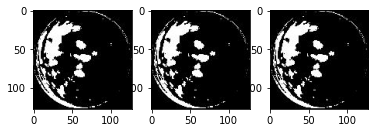

In [20]:
plt.subplot(131)
plt.imshow(im[:,:,0],'gray')

plt.subplot(132)
plt.imshow(im[:,:,1],'gray')

plt.subplot(133)
plt.imshow(im[:,:,2],'gray')

In [31]:
np.reshape(im[:,:,1],(128,128,1)).shape

(128, 128, 1)

In [79]:
X[0].shape

(50, 50, 3)

In [116]:
from sklearn.model_selection import train_test_split
train_y, test_y, train_X, test_X = train_test_split(y, X, test_size=0.2, random_state=42)

In [125]:
from tensorflow import keras
from tensorflow.keras import layers


#import tensorflow.keras.layers.Conv2D as Conv2D
#import tensorflow.keras.layers.Activation as Activation
#import tensorflow.keras.layers.BatchNormalization as BatchNormalization
#import tensorflow.keras.layers.Flatten as Flatten
#import tensorflow.keras.layers.MaxPooling2D as MaxPooling2D
#import tensorflow.keras.layers.Dropout as Dropout
#import tensorflow.keras.layers.Dense as Dense
#import tensorflow.keras.Model as Model

inputShape = X[0].shape
chanDim = -1

filters = [32,32,64]

inputs = tf.keras.Input(shape=inputShape)
# loop over the number of filters
for (i, f) in enumerate(filters):
    if i == 0:
        x = inputs
    # CONV => RELU => BN => POOL
    x = layers.Conv2D(f, (3, 3), padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.BatchNormalization(axis=chanDim)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
        
# flatten the volume, then FC => RELU => BN => DROPOUT
x = layers.Flatten()(x)
x = layers.Dense(10)(x)
x = layers.Activation("relu")(x)
x = layers.BatchNormalization(axis=chanDim)(x)
x = layers.Dropout(0.5)(x)
# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
#x = layers.Dense(4)(x)
#x = layers.Activation("relu")(x)
x = layers.Dense(1, activation="linear")(x)
# construct the CNN
model = tf.keras.Model(inputs, x)

In [126]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
activation_78 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 25, 25, 32)        924

In [127]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os




#(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
#maxPrice = trainAttrX["price"].max()
#train_y = trainAttrX["price"] / maxPrice
#testY = testAttrX["price"] / maxPrice
# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*

opt = Adam(lr=1e-2)#, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
history = model.fit(x=train_X, y=train_y, 
    validation_data=(test_X, test_y),
    epochs=200, batch_size=20)

# make predictions on the testing data
print("[INFO] predicting cloud cover...")
preds = model.predict(test_X)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - test_y
percentDiff = (diff / test_y) * 100
absPercentDiff = np.abs(percentDiff)
#print(absPercentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] training model...
Epoch 1/200
20/20 [==============================] - 2s 67ms/step - loss: 92.3856 - val_loss: 1679.9301
Epoch 2/200
20/20 [==============================] - 1s 61ms/step - loss: 84.1532 - val_loss: 468.1697
Epoch 3/200
20/20 [==============================] - 1s 59ms/step - loss: 83.1570 - val_loss: 130.0352
Epoch 4/200
20/20 [==============================] - 1s 61ms/step - loss: 77.2822 - val_loss: 80.0557
Epoch 5/200
20/20 [==============================] - 1s 61ms/step - loss: 73.5809 - val_loss: 53.3193
Epoch 6/200
20/20 [==============================] - 1s 62ms/step - loss: 64.4633 - val_loss: 55.8215
Epoch 7/200
20/20 [==============================] - 1s 61ms/step - loss: 68.1259 - val_loss: 81.6476
Epoch 8/200
20/20 [==============================] - 1s 60ms/step - loss: 66.6804 - val_loss: 96.1944
Epoch 9/200
20/20 [==============================] - 1s 61ms/step - loss: 68.1973 - val_loss: 77.5796
Epoch 10/200
20/20 [==============================] -

20/20 [==============================] - 1s 70ms/step - loss: 46.3849 - val_loss: 98.9376
Epoch 81/200
20/20 [==============================] - 1s 75ms/step - loss: 48.0415 - val_loss: 102.4876
Epoch 82/200
20/20 [==============================] - 2s 90ms/step - loss: 49.5403 - val_loss: 98.0161
Epoch 83/200
20/20 [==============================] - 2s 102ms/step - loss: 52.1204 - val_loss: 91.2306
Epoch 84/200
20/20 [==============================] - 2s 89ms/step - loss: 51.3534 - val_loss: 93.1505
Epoch 85/200
20/20 [==============================] - 2s 86ms/step - loss: 52.5436 - val_loss: 85.3487
Epoch 86/200
20/20 [==============================] - 2s 92ms/step - loss: 53.1581 - val_loss: 88.3315
Epoch 87/200
20/20 [==============================] - 2s 80ms/step - loss: 49.6993 - val_loss: 87.1102
Epoch 88/200
20/20 [==============================] - 2s 82ms/step - loss: 48.2750 - val_loss: 90.8754
Epoch 89/200
20/20 [==============================] - 2s 87ms/step - loss: 51.6507 -

20/20 [==============================] - 1s 74ms/step - loss: 48.8459 - val_loss: 20325.3730
Epoch 159/200
20/20 [==============================] - 1s 74ms/step - loss: 46.2140 - val_loss: 6455.5698
Epoch 160/200
20/20 [==============================] - 1s 73ms/step - loss: 55.4636 - val_loss: 1011.0681
Epoch 161/200
20/20 [==============================] - 1s 73ms/step - loss: 49.6576 - val_loss: 2023.9789
Epoch 162/200
20/20 [==============================] - 1s 71ms/step - loss: 47.9758 - val_loss: 158.4211
Epoch 163/200
20/20 [==============================] - 1s 73ms/step - loss: 49.4412 - val_loss: 116.3006
Epoch 164/200
20/20 [==============================] - 1s 75ms/step - loss: 47.9323 - val_loss: 78.4844
Epoch 165/200
20/20 [==============================] - 2s 77ms/step - loss: 50.3800 - val_loss: 84.6519
Epoch 166/200
20/20 [==============================] - 1s 71ms/step - loss: 47.5723 - val_loss: 80.3084
Epoch 167/200
20/20 [==============================] - 1s 73ms/step

In [105]:
diff = preds.flatten() - test_y
percentDiff = (diff / test_y) * 100
absPercentDiff = np.abs(percentDiff)
print(absPercentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

ValueError: operands could not be broadcast together with shapes (400,) (100,) 

In [59]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0.5, 1.0, 'BW,500,50x50')

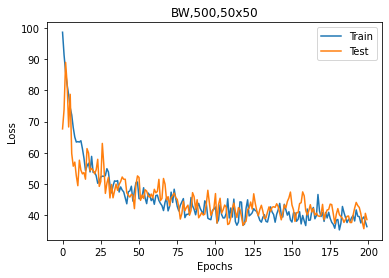

In [112]:
# 50x50 500 BW
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('BW,500,50x50')

In [111]:
history.params

{'verbose': 1, 'epochs': 200, 'steps': 40}

Text(0.5, 1.0, 'RGB,500,50x50')

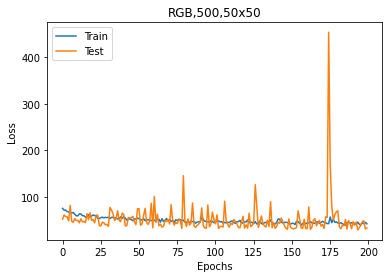

In [120]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('RGB,500,50x50')

In [121]:
history.params

{'verbose': 1, 'epochs': 200, 'steps': 40}